# Income Analysis in German Cities

First, we'll import the necessary libraries and load the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load the German demographic data

In [2]:
df = pd.read_csv('german_people_data.csv')

Create a box plot to show income distribution by city

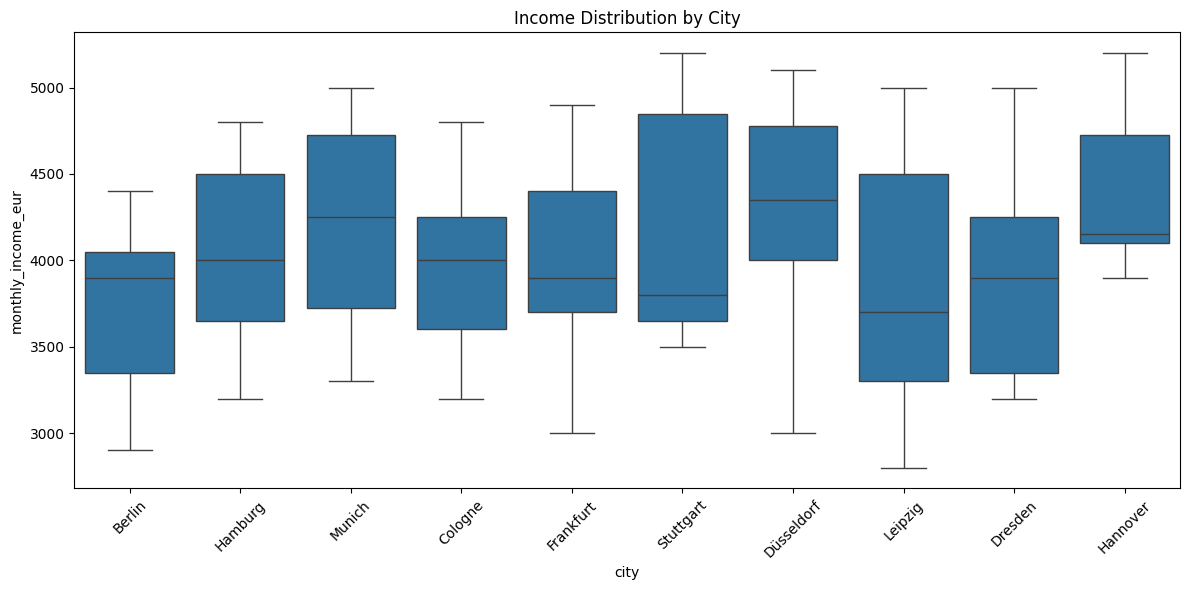

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='monthly_income_eur', data=df)
plt.xticks(rotation=45)
plt.title('Income Distribution by City')
plt.tight_layout()
plt.savefig('income_by_city.png')

Calculate and display mean income by city

In [4]:
city_income = df.groupby('city')['monthly_income_eur'].mean().sort_values(ascending=False)
city_income.to_csv('mean_income_by_city.csv')

Create a scatter plot of age vs income

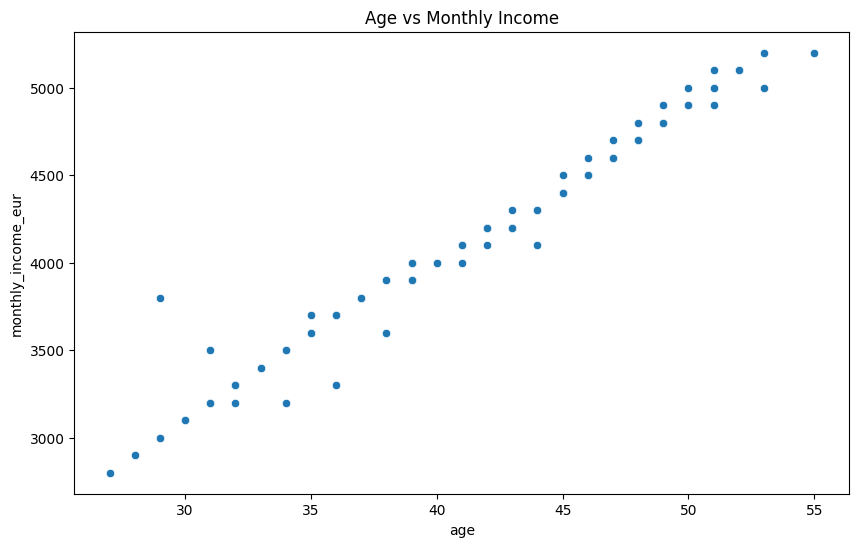

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='monthly_income_eur')
plt.title('Age vs Monthly Income')
plt.savefig('age_vs_income.png')

Perform one-way ANOVA to test if income differences between cities are significant

In [6]:
cities = df['city'].unique()
income_by_city = [df[df['city'] == city]['monthly_income_eur'] for city in cities]
f_stat, p_val = stats.f_oneway(*income_by_city)
with open('anova_results.txt', 'w') as f:
    f.write(f'ANOVA results:\nF-statistic: {f_stat:.4f}\np-value: {p_val:.4f}')